In [0]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import queue
import pydot
import json
from networkx.drawing.nx_pydot import graphviz_layout
from collections import deque, OrderedDict
from google.colab import files

In [0]:
# (u, v, weight)
graph = [
        (1, 2, 7),
        (1, 3, 9),
        (1, 6, 14),
        (2, 3, 10),
        (2, 4, 15),
        (3, 4, 11),
        (3, 6, 2),
        (4, 5, 6),
        (5, 6, 9)
        ]

G = nx.Graph()
G.add_weighted_edges_from(graph)

In [0]:
def draw(g, pos, node_colors, marked_edges=[], visited={}):
  edge_labels = nx.get_edge_attributes(g, 'weight')

  nx.draw(g, pos, node_color=node_colors.values(), with_labels=True, font_color='white')
  nx.draw_networkx_edges(g, pos=pos, edgelist=marked_edges, width=5, alpha=0.5, edge_color='r')
  nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
  
  for node, position in zip(g.nodes(), pos.values()):
    if node in visited:
      plt.text(position[0], position[1]+10, s=f'{visited[node]}', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
  plt.show()

def dijsktra(graph, initial):
  get_marked_edges = lambda p: [(e, p[e]) for e in p]  #returns edges in path
  color_map = OrderedDict([(node, '#0398fc') for node in graph.nodes()])
  pos = graphviz_layout(graph, 'neato', initial)

  draw(graph, pos, color_map)

  visited = {initial: 0}
  path = {}
  color_map[initial] = '#fc0335'

  draw(graph, pos, color_map, get_marked_edges(path), visited)

  nodes = list(graph.nodes())

  while nodes: 
    min_node = None
    for node in nodes:
      if node in visited:
        if min_node is None:
          min_node = node
        elif visited[node] < visited[min_node]:
          min_node = node

    if min_node is None:
      break

    nodes.remove(min_node)
    current_weight = visited[min_node]
    color_map[min_node] = '#fcca03'
    
    for neighbor in graph[min_node]:
      weight = current_weight + graph[min_node][neighbor]['weight']
      if neighbor not in visited or weight < visited[neighbor]:
        visited[neighbor] = weight
        path[neighbor] = min_node
        color_map[neighbor] = '#fc6f03'
    
    draw(graph, pos, color_map, get_marked_edges(path), visited)

  return visited, path

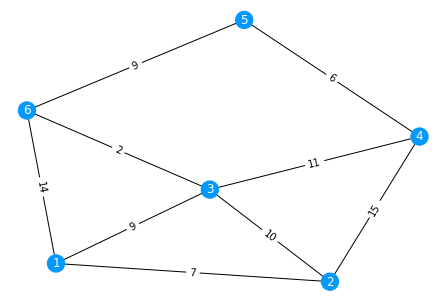

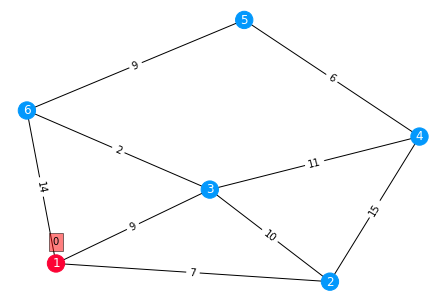

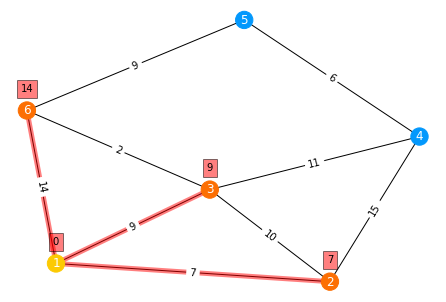

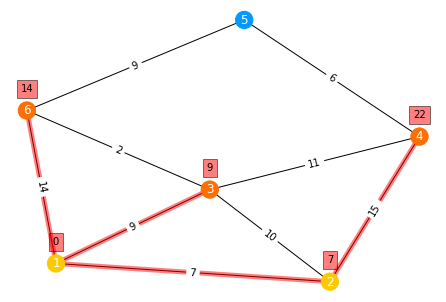

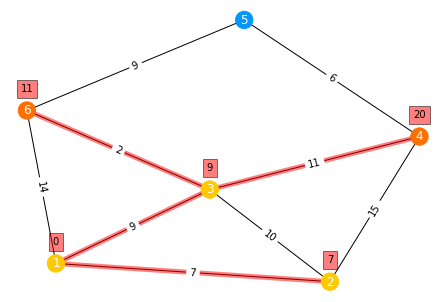

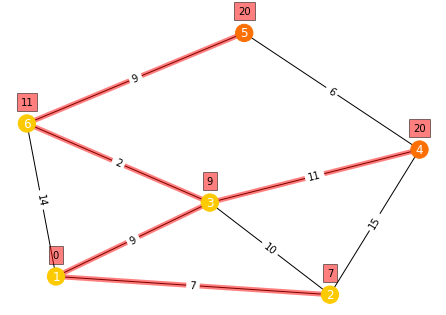

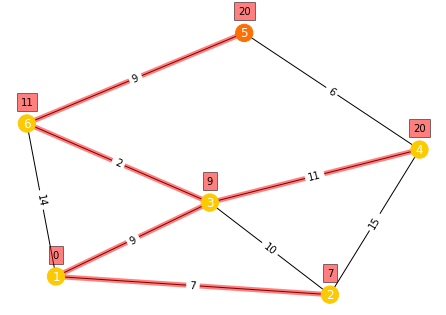

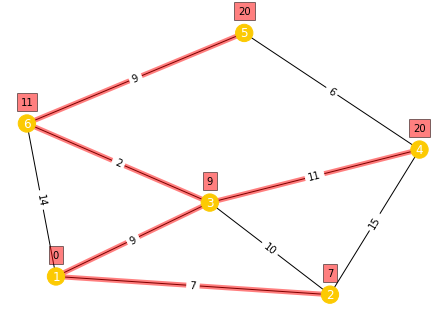

In [4]:
v, p = dijsktra(G, 1)

In [5]:
print(p)

{2: 1, 3: 1, 6: 3, 4: 3, 5: 6}
